### The Gears of Neural Networks: Tensor Operations

#### Element-wise operations

In [1]:
import numpy as np

ReLU formula in math form:

$$
\operatorname{ReLU}(x) = \max(0, x) =
\begin{cases}
0, & x < 0 \\
x, & x \ge 0
\end{cases}
$$

In [2]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [3]:
x = np.array([
    [-2.0, -1.0, 0.0],
    [1.0, 2.0, -3.0]
])

naive_relu(x)

array([[0., 0., 0.],
       [1., 2., 0.]])

#### What `naive_relu` is doing

The `naive_relu(x)` function applies the ReLU (Rectified Linear Unit) activation element-wise to a 2D NumPy array `x`. It first makes a copy of `x` so the original isn’t modified, then loops over every element and replaces any negative value with `0`, leaving positive values unchanged. The result is a new array where all entries are `>= 0`.

In [4]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [5]:
x = np.array([[1.0, -2.0]])
y = np.array([[0.5, -2.0]])

naive_add(x, y)

array([[ 1.5, -4. ]])

#### What `naive_add` is doing

The `naive_add(x, y)` function performs element-wise addition on two 2D NumPy arrays of the same shape. It first checks that both inputs are 2D and have identical shapes, then makes a copy of `x` so the original isn’t modified. It loops over every index `(i, j)` and adds `y[i, j]` to `x[i, j]`, returning the resulting summed array.

#### Numpy implementation

In [6]:
z = x + y 
print("Element-wise Addition:", z)

z = np.maximum(z, 0.0)
print("Element-wise ReLU:", z)

Element-wise Addition: [[ 1.5 -4. ]]
Element-wise ReLU: [[1.5 0. ]]


In [7]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.0)
print("Took: {0:.3f}s".format(time.time() - t0))

Took: 0.002s


In [8]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.3f}s".format(time.time() - t0))

Took: 0.792s


### Broadcasting

#### What broadcasting means

Broadcasting is NumPy’s way of automatically expanding arrays with smaller shapes so they can participate in element-wise operations with larger arrays, without actually copying data. For example, adding an array of shape `(32, 10)` and a vector of shape `(10,)` works because NumPy “stretches” the `(10,)` vector across the 32 rows, effectively treating it like a `(32, 10)` array during the computation.

In [9]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

X = np.random.random((32, 10)) # random matrix with shape (32, 10)
y = np.random.random((10,))    # random vector with shape (10,) 

In [10]:
print("First 5 rows of X matrix:\n", X[:5])
print("X shape:", X.shape)
print("\ny vector:", y)
print("y shape:", y.shape)

First 5 rows of X matrix:
 [[0.95468661 0.6696795  0.86588025 0.60554508 0.67625068 0.38859257 0.17250667 0.30831384 0.58927947 0.53340815]
 [0.52818186 0.34954165 0.976225   0.89214585 0.44904923 0.25531412 0.66270623 0.68360787 0.14743681 0.79692839]
 [0.06918924 0.91553582 0.75395559 0.55385519 0.65615157 0.75190926 0.11872109 0.06929882 0.0453673  0.8436997 ]
 [0.90080117 0.62690748 0.71766775 0.8516183  0.87658029 0.71064239 0.76950633 0.01688245 0.34817676 0.35375491]
 [0.77903043 0.98303947 0.25168945 0.25970123 0.88556099 0.49775986 0.26778586 0.30450927 0.02262581 0.81283139]]
X shape: (32, 10)

y vector: [0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]
y shape: (10,)


In [11]:
# Add an empty first axis to y, changing the shape to (1, 10) now
Y = np.expand_dims(y, axis=0) 

In [12]:
print("Y:", Y)
print("Y shape:", Y.shape)

Y: [[0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]]
Y shape: (1, 10)


In [13]:
# Repeat `y` 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), 
# where Y[i, :] == y for i in range(0, 32)
Y = np.tile(y, (32, 1))

In [14]:
print("Y first 5 rows of matrix:\n", Y[:5])
print("Y shape:", Y.shape)

Y first 5 rows of matrix:
 [[0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]
 [0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]
 [0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]
 [0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]
 [0.76381847 0.43688896 0.7844504  0.08091047 0.38355947 0.35713916 0.12323372 0.5988977  0.69904203 0.50719204]]
Y shape: (32, 10)


In [15]:
print("Adding first 5 rows of X and Y:", X[:5] + Y[:5])

Adding first 5 rows of X and Y: [[1.71850508 1.10656846 1.65033065 0.68645554 1.05981014 0.74573173 0.29574039 0.90721154 1.2883215  1.04060018]
 [1.29200033 0.78643061 1.7606754  0.97305632 0.8326087  0.61245328 0.78593995 1.28250557 0.84647885 1.30412043]
 [0.83300771 1.35242478 1.53840598 0.63476566 1.03971103 1.10904842 0.24195481 0.66819652 0.74440933 1.35089173]
 [1.66461964 1.06379644 1.50211815 0.93252877 1.26013975 1.06778155 0.89274005 0.61578015 1.04721879 0.86094694]
 [1.54284889 1.41992843 1.03613985 0.34061169 1.26912045 0.85489902 0.39101958 0.90340697 0.72166784 1.32002342]]


In [16]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2    # rank-2 NumPy tensor
    assert len(y.shape) == 1    # NumPy vector
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += [y[j]]
    return x

In [17]:
x = np.random.random((64, 3, 32, 10)) 
y = np.random.random((32, 10))

#### What `x` and `y` represent here

- `x = np.random.random((64, 3, 32, 10))`  
  This is a 4D tensor. You can read the shape as:  
  - 64: number of samples in the batch  
  - 3: channels per sample (e.g., RGB or feature maps)  
  - 32: height (number of rows)  
  - 10: width (number of columns)  

- `y = np.random.random((32, 10))`  
  This is a 2D tensor with the same height and width as each channel of `x` (`32 × 10`). It can be thought of as a single “feature map” that could be broadcast or added to each channel/location in `x`.

In [18]:
z = np.maximum(x, y)

In [19]:
z.shape

(64, 3, 32, 10)

#### Tensor product

The tensor product, also called dot product or matmul (short for “matrix multiplication”) is
one of the most common, most useful tensor operations.
In NumPy, a tensor product is done using the `np.matmul` function, and in Keras, with
the `keras.ops.matmul` function. Its shorthand is the `@` operator in Python

In [20]:
x = np.random.random((32,))
y = np.random.random((32,))

z = np.matmul(x, y) # Dot product
z = x @ y # Equivalent operation

In [21]:
z

np.float64(6.081076210040603)

In mathematical notation, you’d note the operation with a dot (•) (hence the name
“dot product”):

`z = x • y`

In [22]:
def naive_vector_product(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [23]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([4.0, 5.0, 6.0])

naive_vector_product(x, y)

np.float64(32.0)

1⋅4 + 2⋅5 + 3⋅6 = 4 + 10 + 18 = 32

In [24]:
def naive_matrix_vector_product(x, y):
    assert len(x.shape) == 2 # x is a NumPy matrix.
    assert len(y.shape) == 1 # y is a NumPy vector.
    assert x.shape[1] == y.shape[0] # The 1st dimension of x must equal the 0th dimension of y!
    z = np.zeros(x.shape[0]) # This operation returns a vector of 0s with as many rows as x.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            print(f"x[i, j]: {x[i, j]}")
            print(f"y[j]: {y[j]}")
            z[i] += x[i, j] * y[j]
            print(f"z: {z} \n")
    return z

In [25]:
x = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])  # shape (2, 3)

y = np.array([7.0, 8.0, 9.0])  # shape (3,)

naive_matrix_vector_product(x, y)

x[i, j]: 1.0
y[j]: 7.0
z: [7. 0.] 

x[i, j]: 2.0
y[j]: 8.0
z: [23.  0.] 

x[i, j]: 3.0
y[j]: 9.0
z: [50.  0.] 

x[i, j]: 4.0
y[j]: 7.0
z: [50. 28.] 

x[i, j]: 5.0
y[j]: 8.0
z: [50. 68.] 

x[i, j]: 6.0
y[j]: 9.0
z: [ 50. 122.] 



array([ 50., 122.])

In [26]:
def naive_matrix_vector_product_v2(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        print(f"x[{i}]:", x[i, :])
        z[i] = naive_vector_product(x[i, :], y)
    return z

In [27]:
x = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])  # shape (2, 3)

y = np.array([7.0, 8.0, 9.0])  # shape (3,)

naive_matrix_vector_product_v2(x, y)

x[0]: [1. 2. 3.]
x[1]: [4. 5. 6.]


array([ 50., 122.])

In [28]:
def naive_matrix_product(x, y):
    assert len(x.shape) == 2 # NumPy Matrix
    assert len(y.shape) == 2 # NumPy Matrix
    assert x.shape[1] == y.shape[0] # The 1st dimension of x must equal the 0th dimension of y
    z = np.zeros((x.shape[0], y.shape[1])) # This operation returns a matrix of 0s with a specific shape.
    for i in range(x.shape[0]): # Iterates over the rows of x
        for j in range(y.shape[1]): # Iterates over the columns of y    
            row_x = x[i, :]
            print("x", row_x)
            column_y = y[:, j]
            print("y", column_y)
            z[i, j] = naive_vector_product(row_x, column_y)
            print("z", z, "\n")
    return z

In [29]:
x = np.array([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])  # shape (2, 3)

y = np.array([
    [7.0, 8.0],
    [9.0, 10.0],
    [11.0, 12.0]
])  # shape (3, 2)

naive_matrix_product(x, y)

x [1. 2. 3.]
y [ 7.  9. 11.]
z [[58.  0.]
 [ 0.  0.]] 

x [1. 2. 3.]
y [ 8. 10. 12.]
z [[58. 64.]
 [ 0.  0.]] 

x [4. 5. 6.]
y [ 7.  9. 11.]
z [[ 58.  64.]
 [139.   0.]] 

x [4. 5. 6.]
y [ 8. 10. 12.]
z [[ 58.  64.]
 [139. 154.]] 



array([[ 58.,  64.],
       [139., 154.]])

<nop/> <div style="width: 700px;">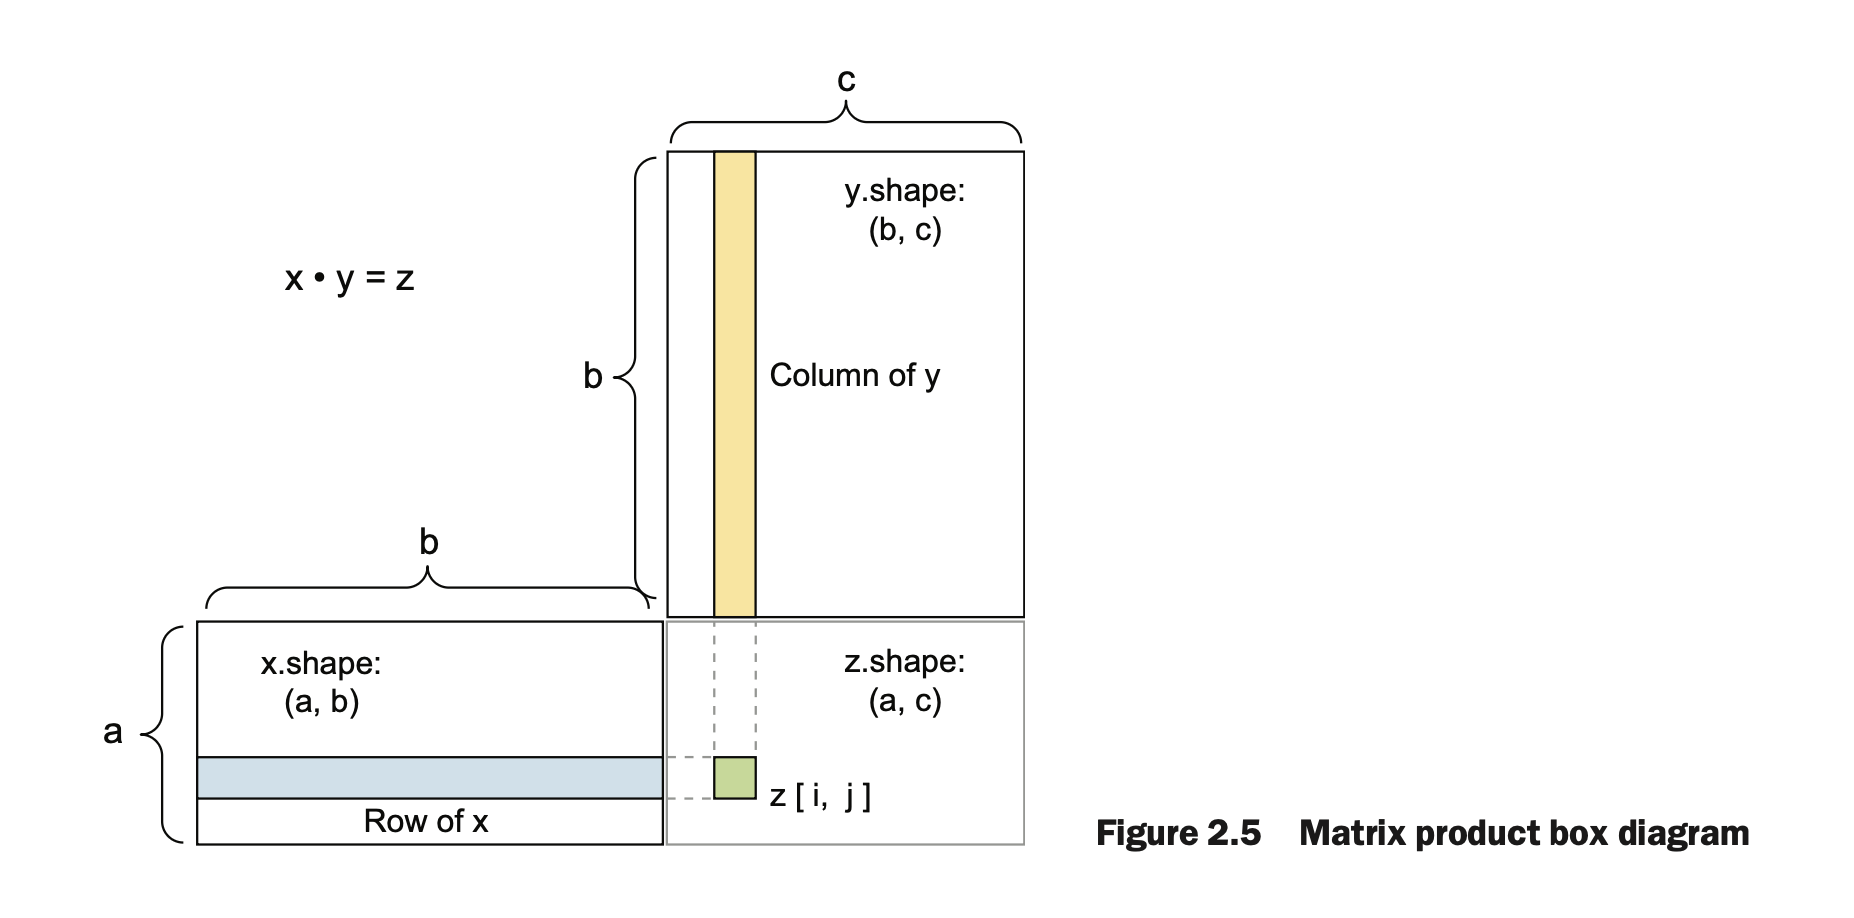</div>

<nop/> <div style="width: 700px;">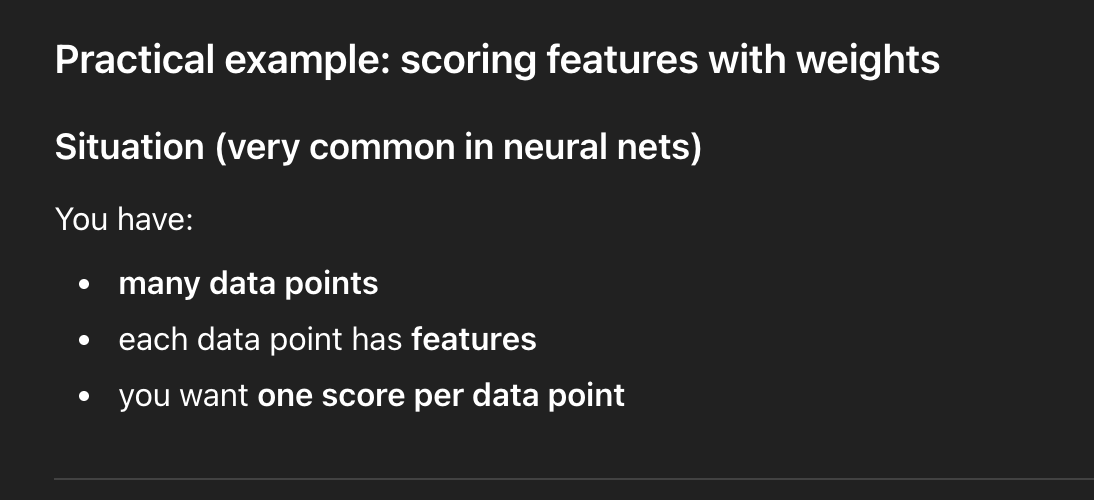</div>
<nop/> <div style="width: 700px;">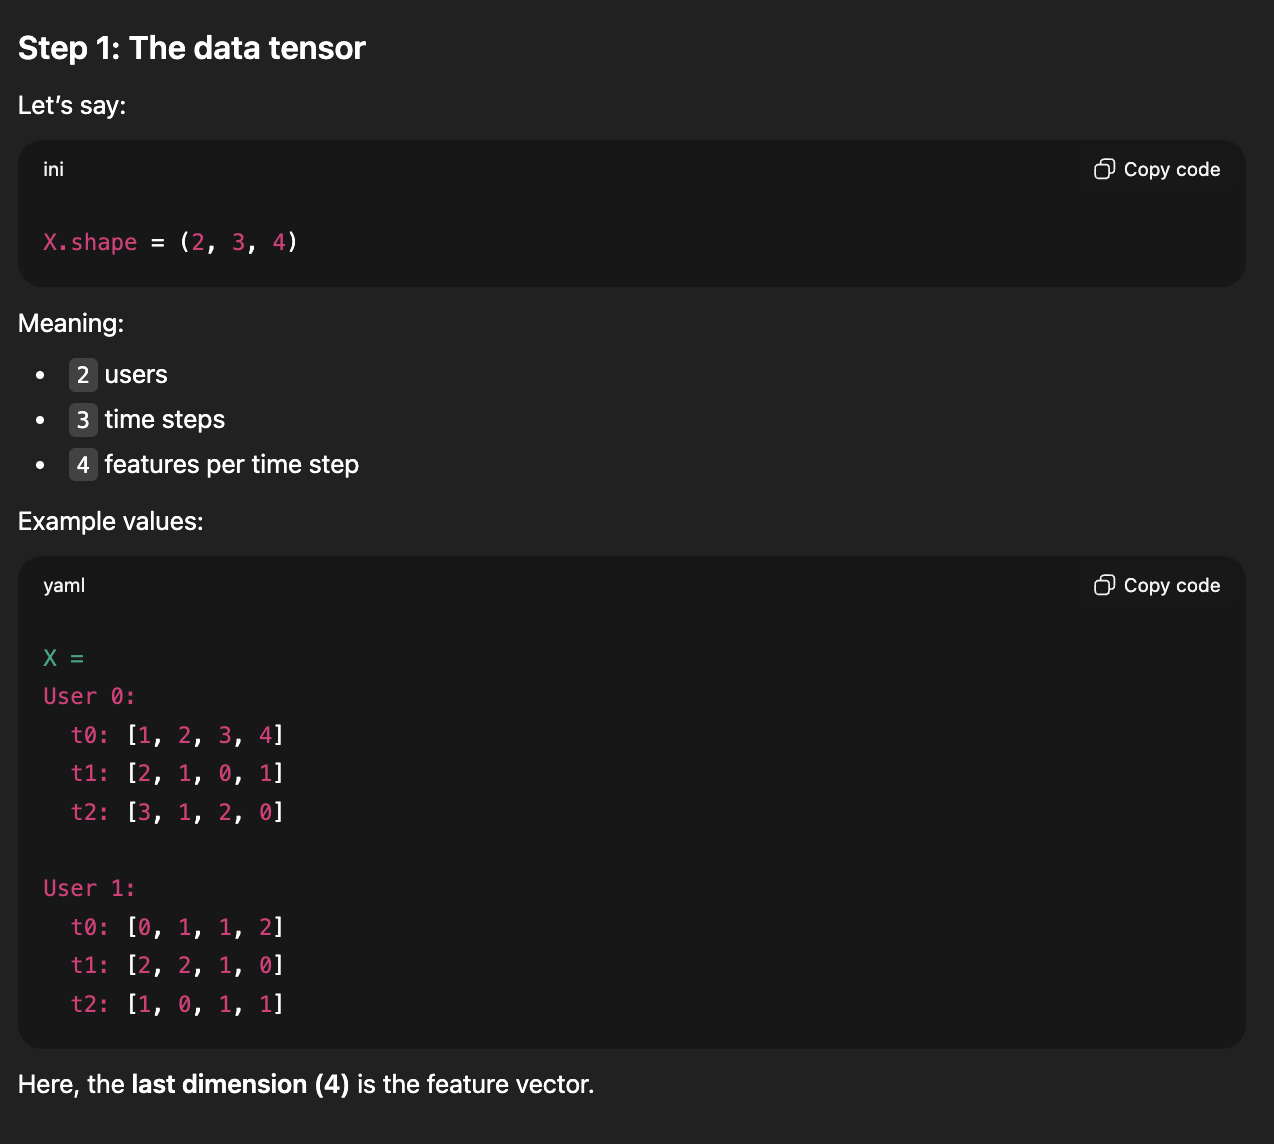</div>
<nop/> <div style="width: 700px;">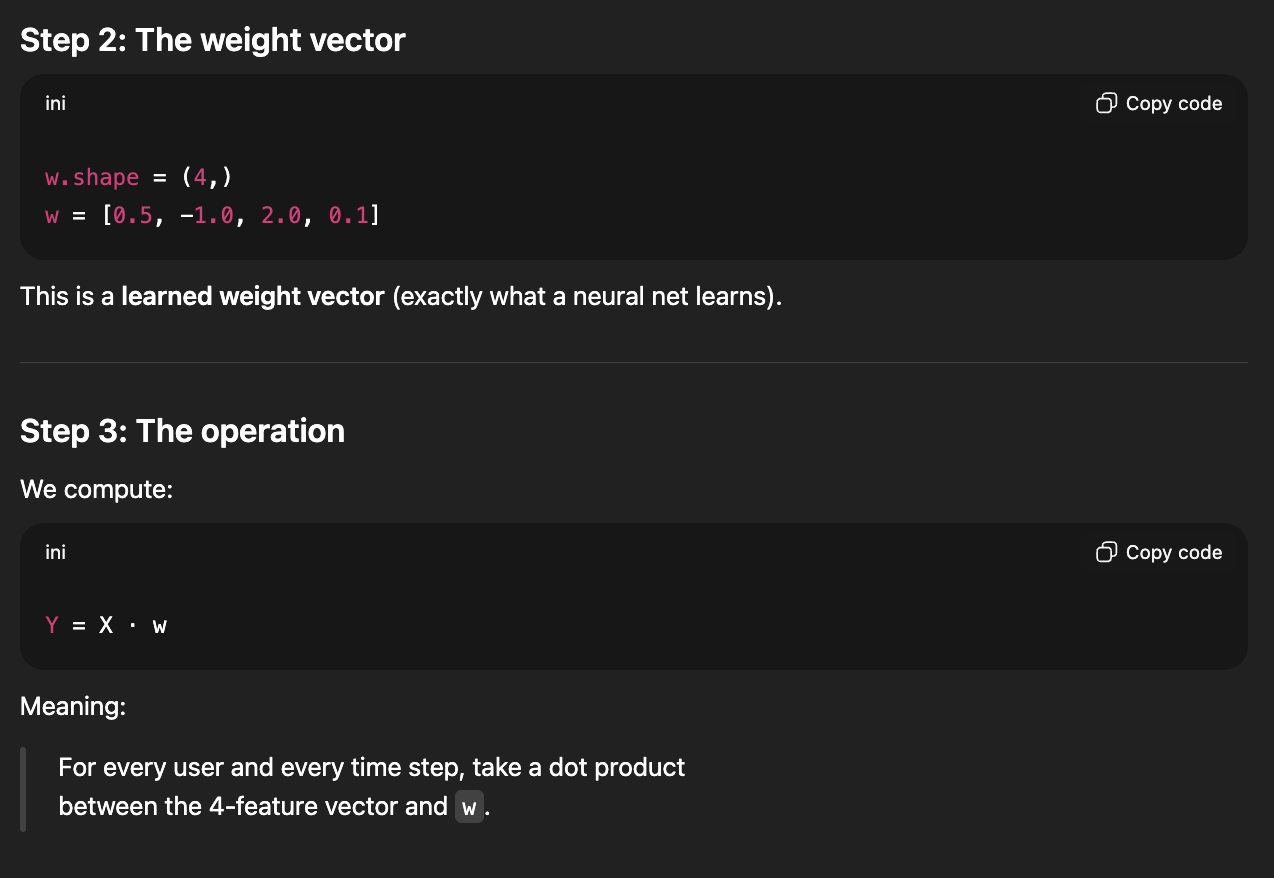</div>
<nop/> <div style="width: 700px;">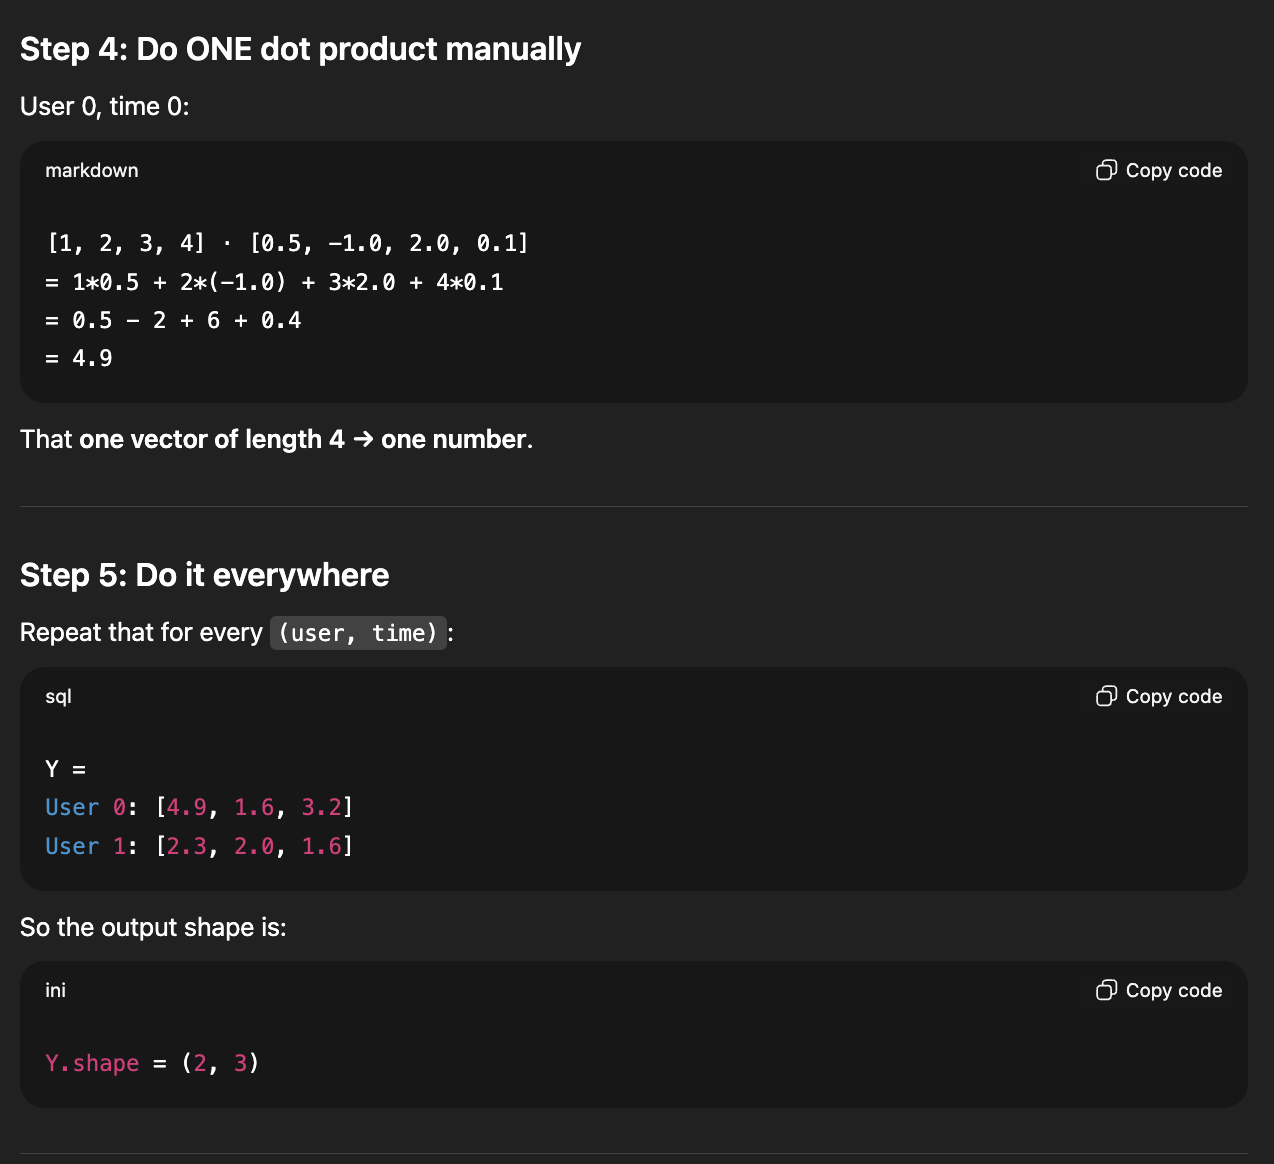</div>
<nop/> <div style="width: 700px;">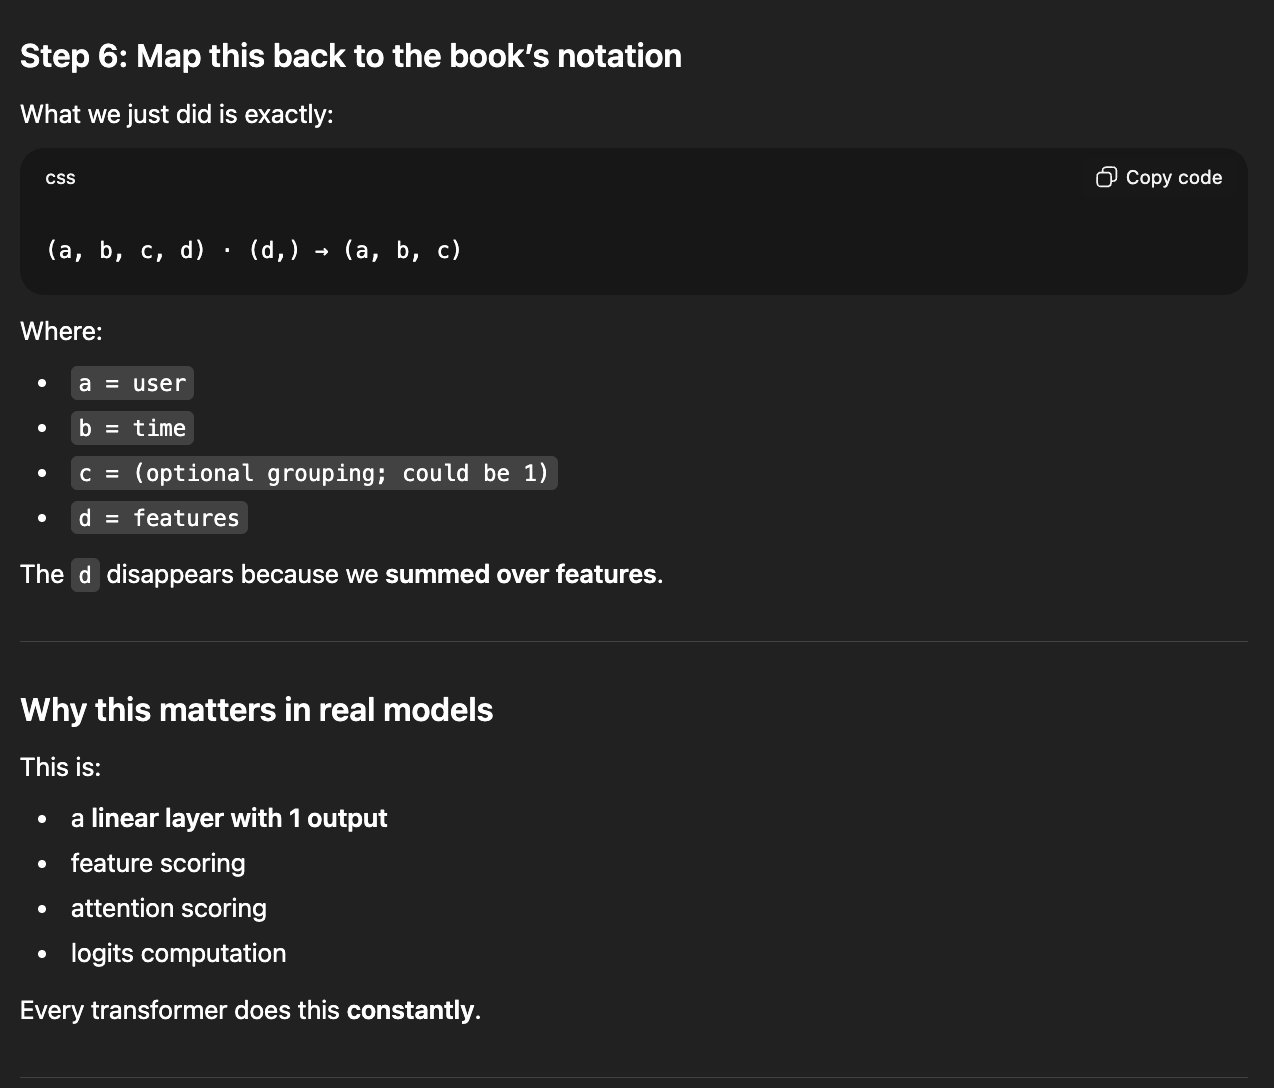</div>
<!-- 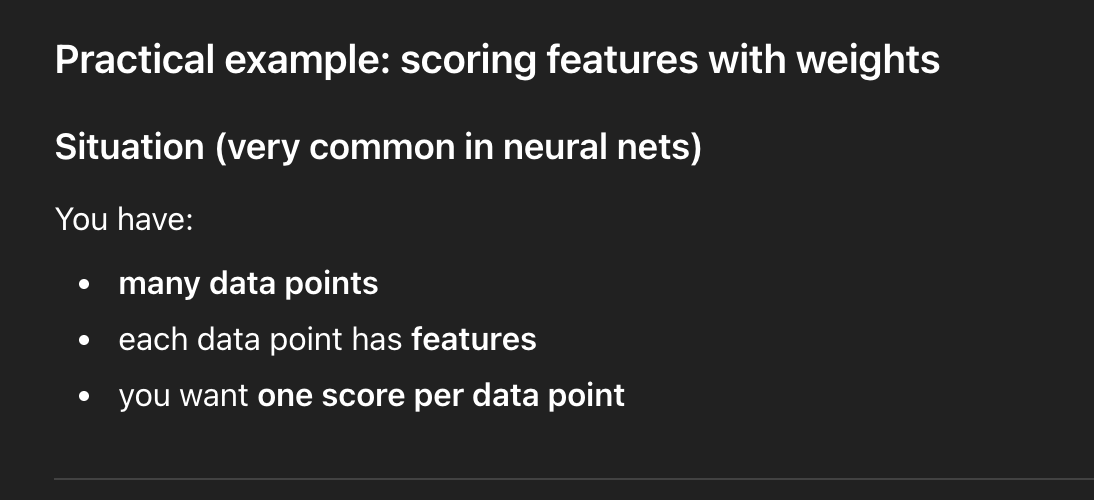
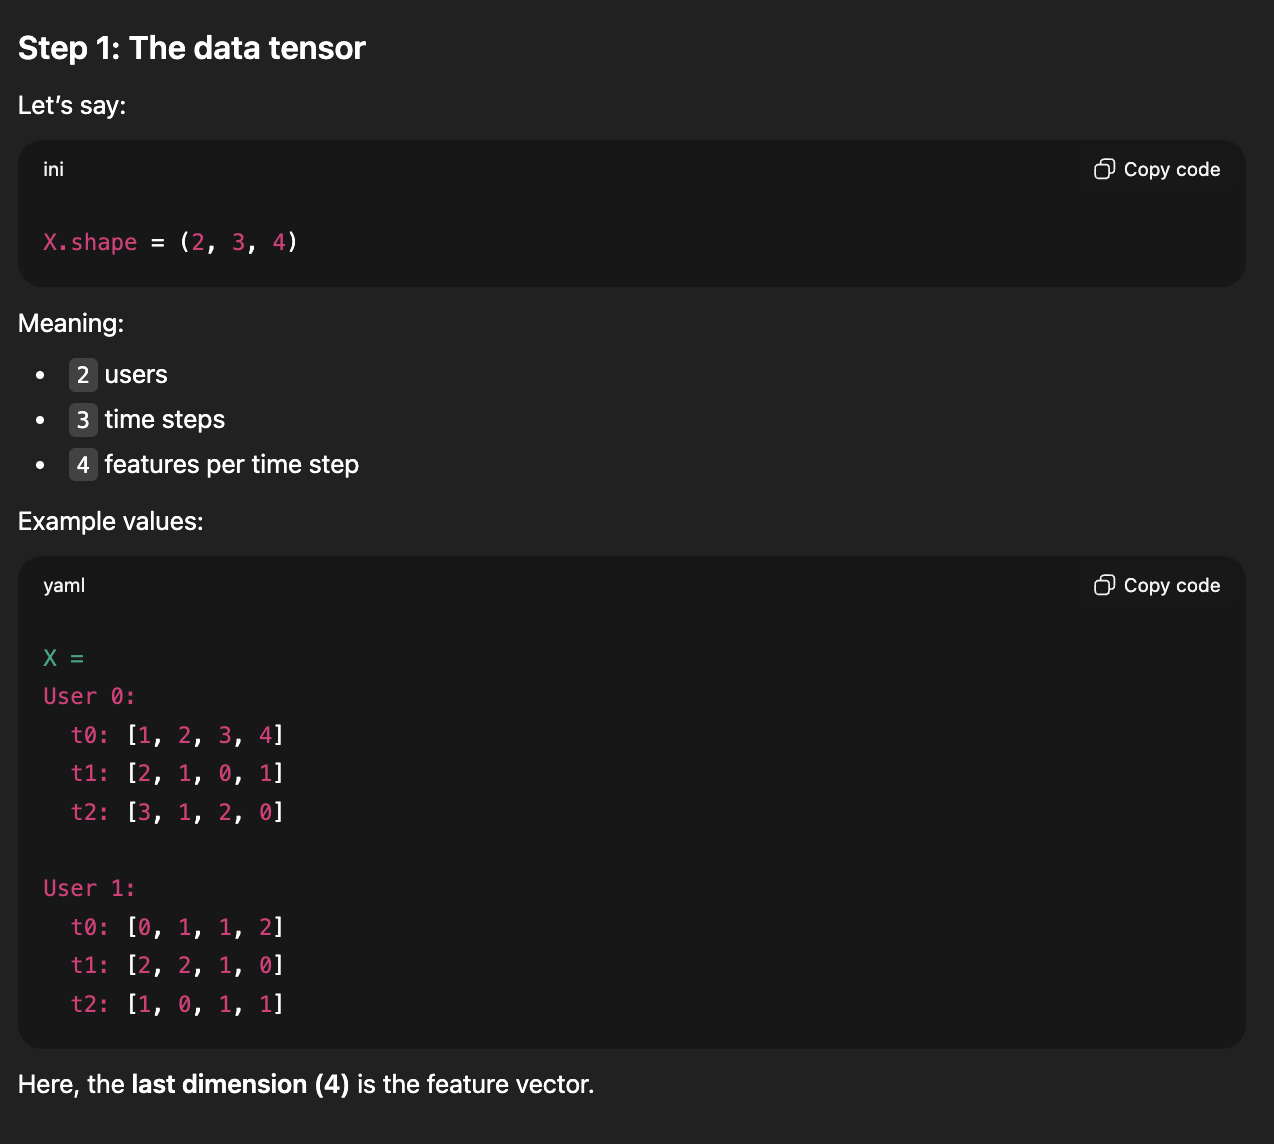
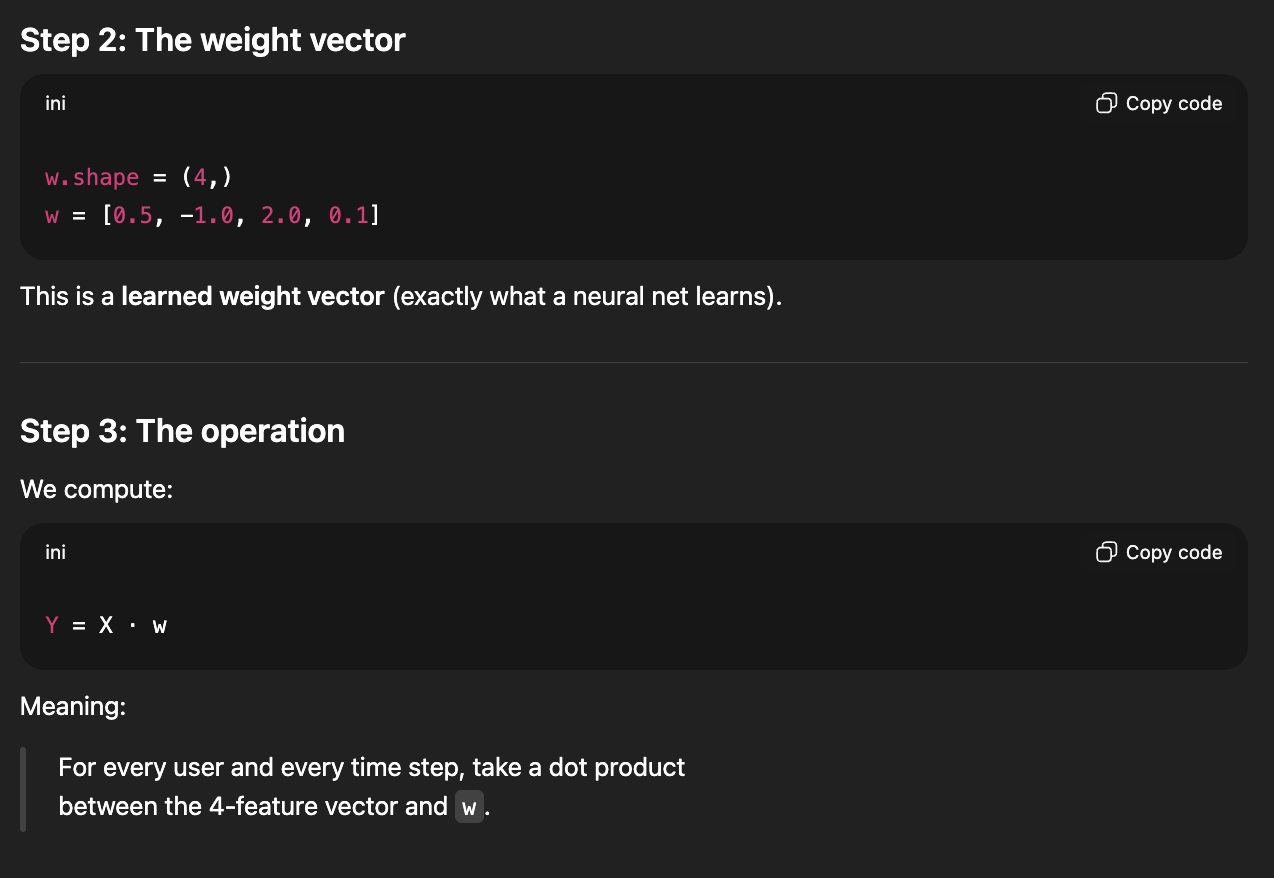
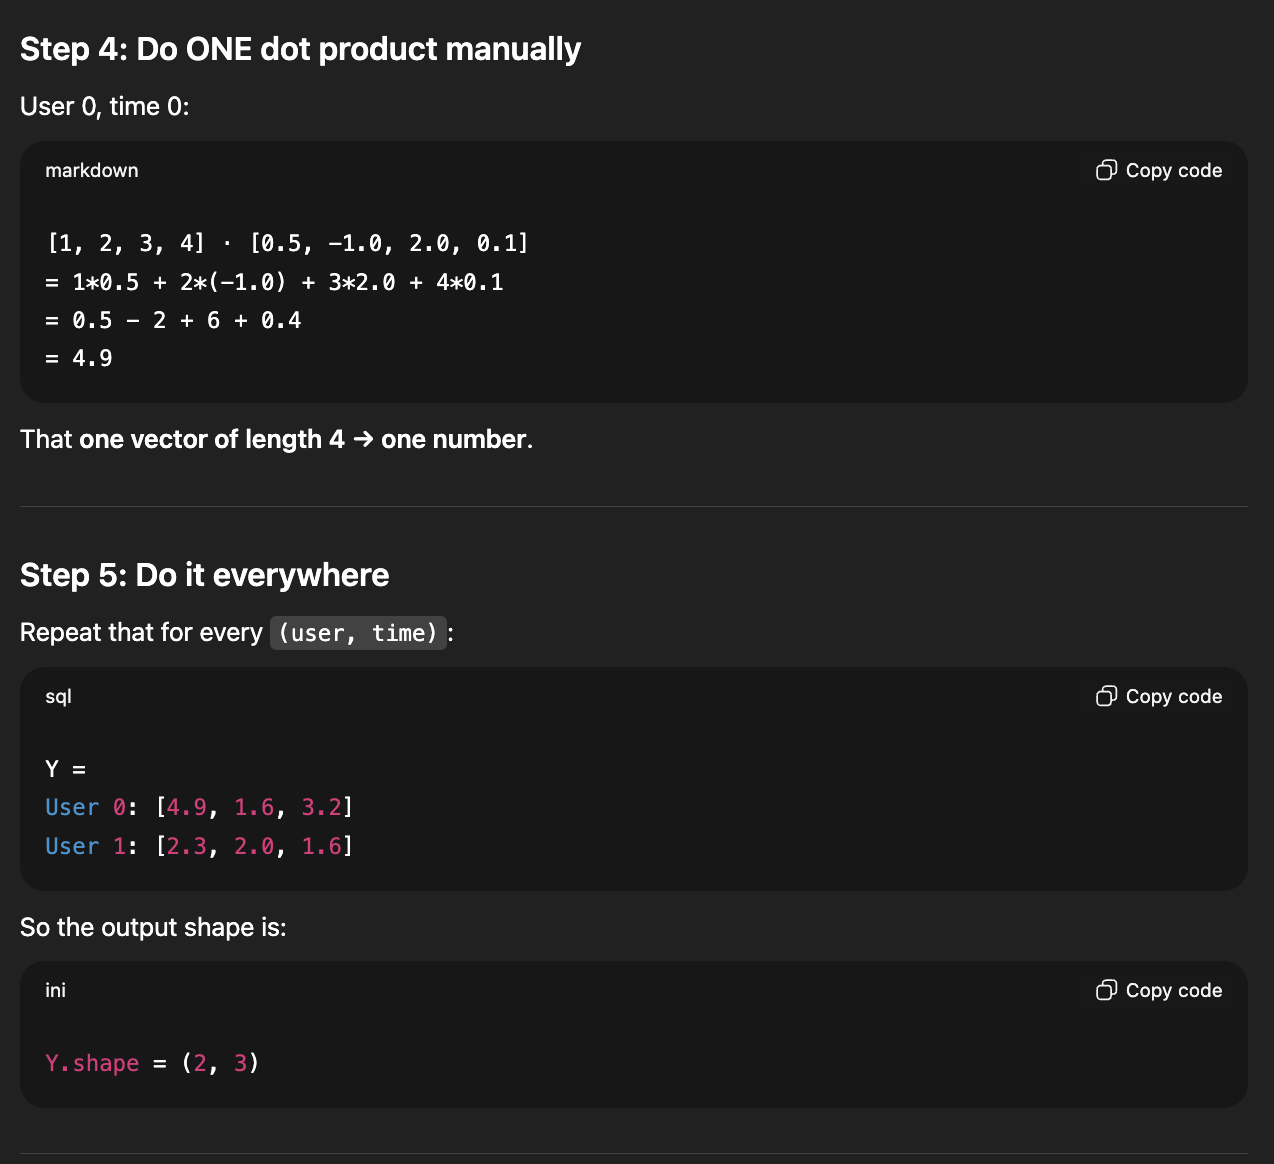
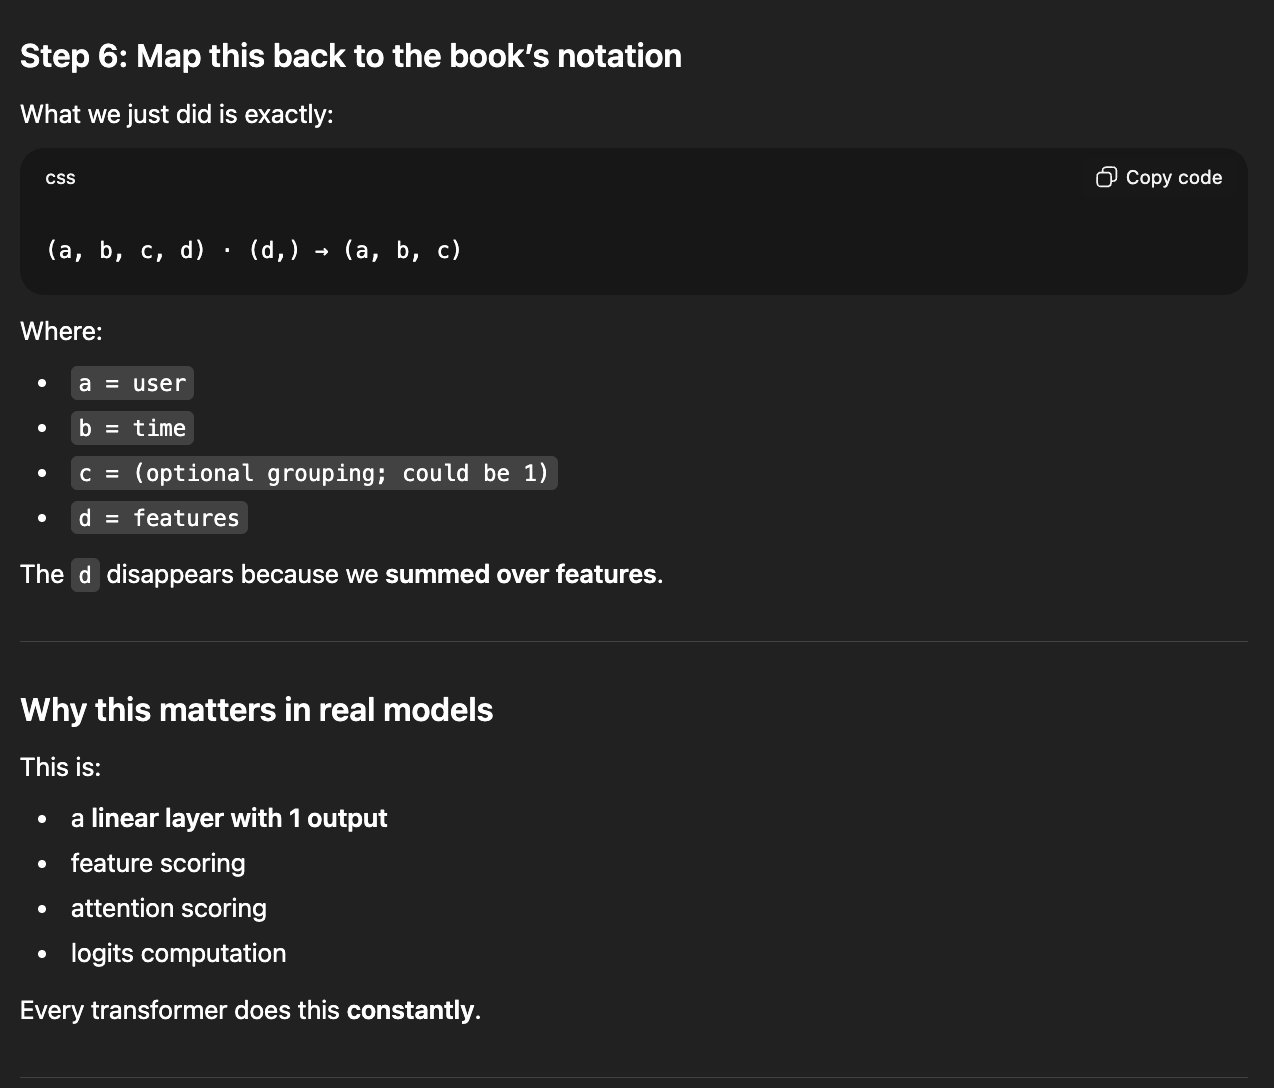 -->

#### Tensor reshaping

In [30]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print("train images before:", train_images.shape)
train_images = train_images.reshape((60000, 28 * 28))
print("train images after:", train_images.shape)
print(train_images[0])
print(train_images[0].shape)

train images before: (60000, 28, 28)
train images after: (60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 2

In [32]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.,]])

x.shape

(3, 2)

In [33]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [34]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [35]:
x = np.zeros((300, 20))
x[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
x = np.transpose(x)
x.shape

(20, 300)